**Image Gradients**: Change in intensity along x & y Direction
Useful to find edges

* **Sobel Operator**: Apply Gaussian smoothing & then 1st order differential in x & y
* **Laplacian Operator**: 2nd order differential

In [1]:
!wget 'https://pmctvline2.files.wordpress.com/2018/02/family-guy-stewie.jpg'
i_img_path = 'family-guy-stewie.jpg'

--2020-07-26 22:47:38--  https://pmctvline2.files.wordpress.com/2018/02/family-guy-stewie.jpg
Resolving pmctvline2.files.wordpress.com (pmctvline2.files.wordpress.com)... 192.0.72.26, 192.0.72.27
Connecting to pmctvline2.files.wordpress.com (pmctvline2.files.wordpress.com)|192.0.72.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98136 (96K) [image/jpeg]
Saving to: ‘family-guy-stewie.jpg’

family-guy-stewie.j 100%[===================>]  95.84K  --.-KB/s    in 0.07s   

2020-07-26 22:47:38 (1.43 MB/s) - ‘family-guy-stewie.jpg’ saved [98136/98136]



In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

**Sobel Operator: **
* fx = df(x, y) / dx, 
* fy = df(x, y) / dy, 
* mag=(fx² + fy²) ** 0.5
* direction = arctan(fy / fx)

for image (discrete), x-direction
* fx_backward = f(i, j) - f(i - 1, j) 
* fx_forward = f(i + 1, j) - f(i, j) 
* fx_symmetrical = f(i + 1, j) - f(i - 1, j) 

Text(0.5, 1.0, 'Sobel_y')

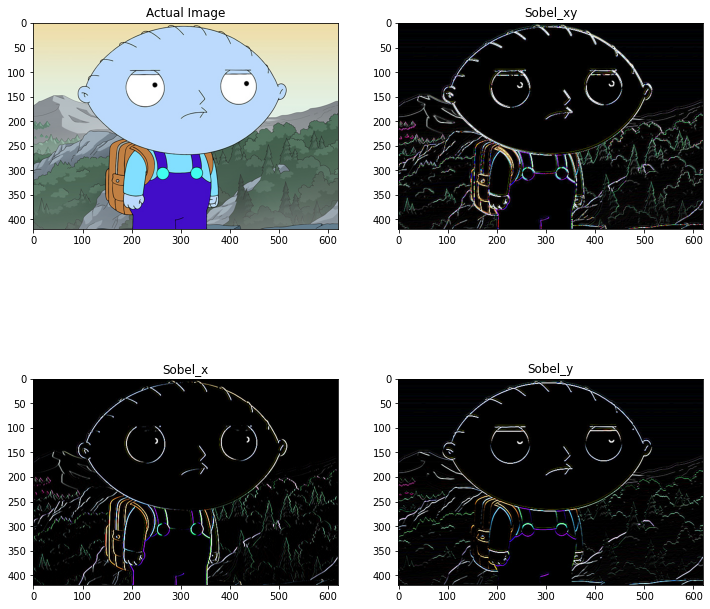

In [34]:
sobel_kernel_x = np.array(
    [[-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]]
)
sobel_kernel_y = np.array(
    [[-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]]
)

img = cv2.imread(i_img_path)

grad_x = cv2.filter2D(img,-1, sobel_kernel_x)
grad_y = cv2.filter2D(img,-1, sobel_kernel_y)
mag = (grad_x ** 2 + grad_y ** 2) ** 0.5
both_dir = grad_x + grad_y

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(12, 12)
axs[0, 0].imshow(img); axs[0, 0].set_title('Actual Image')
axs[0, 1].imshow(both_dir); axs[0, 1].set_title('Sobel_xy')
axs[1, 0].imshow(grad_x); axs[1, 0].set_title('Sobel_x')
axs[1, 1].imshow(grad_y); axs[1, 1].set_title('Sobel_y')

**Laplacian Derivative**: g = d²f(x, y) / dx² + d²f(x, y) / dy²

**For discrete (Images)**, g²(x) = f(x + 1, y) - 2*f(x, y) + f(x - 1, y), similarly for y direction

Text(0.5, 1.0, 'Laplacian')

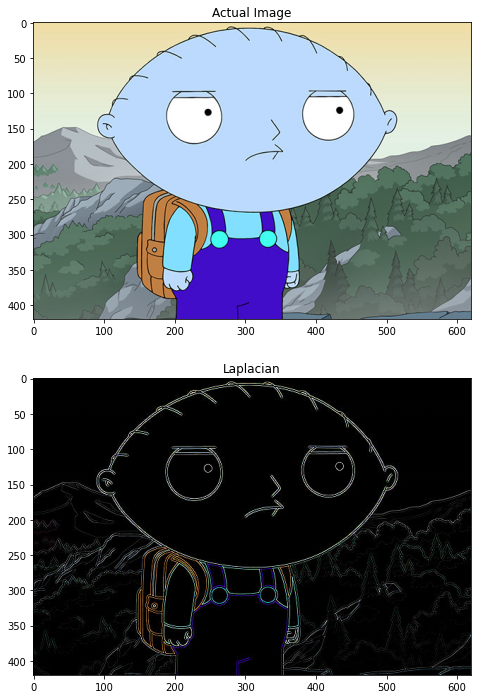

In [30]:
laplacian_kernel = np.array(
    [[0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]]
)
img = cv2.imread(i_img_path)

grad = cv2.filter2D(img,-1, laplacian_kernel)
fig, axs = plt.subplots(2, 1)
fig.set_size_inches(8, 12)
axs[0].imshow(img); axs[0].set_title('Actual Image')
axs[1].imshow(grad); axs[1].set_title('Laplacian')

Since, **Image contains noise, Gaussian Filter can be used to smooth the image befor applying Laplacian (or Sobel) operatotr**

**LoG (Laplacisn of Gaussian) operator**: Double differntial of gaussian operator

```
# Laplacian, g² = d²f / dx² + d²f / dy²
Given, Image I
Apply Gaussian Filer to remove Noise, Let's say Output Image is Is
Is = I * G_kernel
Now, apply Laplacian operator to find the edges, Let's say Output Image is Ie
Ie = Is * L_kernel = I * G_kernel * L_kernel = I * (G_kernel * L_kernel) = I * LoG_kernel
```

